Import the necessary libraries for analysis

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Read the csv file
pd.set_option("display.max_columns", 100) #shows all columns in the table 
udemy_courses = pd.read_csv(r'E:\Dataset\udemy_courses.csv')
udemy_courses.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
# since we might not use the url and course_id column, we might as well drop it. This is optional and maybe not recommended
#udemy_courses = udemy_courses.drop('course_id', axis = 1)
#udemy_courses = udemy_courses.drop('url', axis = 1)
#udemy_courses.head(5)

#### Getting to know our data

In [4]:
udemy_courses.info() #the info function gives an overvie of the number of columns and their names, null values, and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 247.9+ KB


In [5]:
udemy_courses.describe()
#the describe function takes all columns with numerical values and gives a statistical breakdown of each column

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


Text(0.5, 1.0, 'Boxplot of prices')

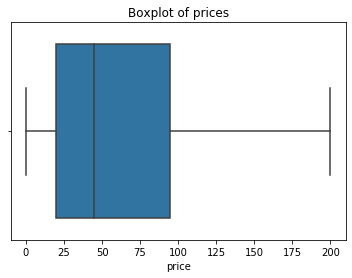

In [6]:
#The above can also be done with a box plot. Getting the 5 number summary
sns.boxplot(udemy_courses["price"]).set_title("Boxplot of prices")

#### Separating Date and Time into Individual Columns

In [7]:
udemy_courses['published_timestamp'] = pd.to_datetime(udemy_courses['published_timestamp'])
udemy_courses['date_published'] = udemy_courses['published_timestamp'].dt.date
udemy_courses['time_published'] = udemy_courses['published_timestamp'].dt.time
#udemy_courses = udemy_courses.drop('published_timestamp', axis = 1)# dropped the published timestamp column since it has been splitted
#udemy_courses.head(5)

In [8]:
# further splitting into year, month, and hour published
udemy_courses['year'] = pd.DatetimeIndex(udemy_courses['date_published']).year
udemy_courses['month'] = pd.DatetimeIndex(udemy_courses['date_published']).month
udemy_courses['hour'] = pd.to_datetime(udemy_courses['time_published'], format='%H:%M:%S').dt.hour
udemy_courses.head(5)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date_published,time_published,year,month,hour
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18,20:58:58,2017,1,20
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09,16:34:20,2017,3,16
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19,19:26:30,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30,20:07:24,2017,5,20
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13,14:57:18,2016,12,14


#### Grouping (Binning) the prices into four categories. Free (0), Low (1-75), Medium (76-150), and High (151-200)

In [10]:
conditions = [
    udemy_courses['price'] == 0,
    ((udemy_courses['price'] > 0) & (udemy_courses['price'] <= 75)),
    ((udemy_courses['price'] > 75) & (udemy_courses['price'] <=150))
]

choices = [
    'Free',
    'Low',
    'Medium'
]

# create a new column or assign it to an existing
# the last param in np.select is default
udemy_courses['price_bin'] = np.select(conditions, choices, 'High')

In [11]:
udemy_courses.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date_published,time_published,year,month,hour,price_bin
3509,294408,Learn to Make an Animated Image Gallery using ...,https://www.udemy.com/learn-to-make-an-animate...,False,0,11080,165,7,Beginner Level,1.0,2014-11-20 11:37:05+00:00,Web Development,2014-11-20,11:37:05,2014,11,11,Free
2353,582390,Instant Harmonica - play When the Saints on ha...,https://www.udemy.com/instant-harmonica-play-w...,True,20,31,1,10,Beginner Level,1.0,2015-08-14 18:30:56+00:00,Musical Instruments,2015-08-14,18:30:56,2015,8,18,Low
648,975414,Contango VXX - ETF Options Trading - Double Yo...,https://www.udemy.com/contango-vxx-trading-idi...,True,200,513,20,20,All Levels,1.0,2016-10-06 15:10:38+00:00,Business Finance,2016-10-06,15:10:38,2016,10,15,High
775,103144,Forex Elite Trading,https://www.udemy.com/elite-forex-trading-syst...,True,85,623,7,22,All Levels,6.0,2013-10-18 16:06:44+00:00,Business Finance,2013-10-18,16:06:44,2013,10,16,Medium
511,999262,Forex online live trading system (Special Offer),https://www.udemy.com/forex-trading-i-will-sho...,True,200,31,8,34,All Levels,5.5,2016-11-07 14:51:41+00:00,Business Finance,2016-11-07,14:51:41,2016,11,14,High


#### Re-arranging the columns to make the price group next to the price column

In [12]:
cols = list(udemy_courses.columns) #this takes all our columns at once
udemy_courses = udemy_courses[cols[0:4] + [cols[-1]] + cols[4:17]]
udemy_courses.head(5)

,course_id,course_title,url,is_paid,price_bin,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date_published,time_published,year,month,hour
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,High,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18,20:58:58,2017,1,20
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,Low,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09,16:34:20,2017,3,16
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,Low,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19,19:26:30,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,Medium,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30,20:07:24,2017,5,20
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,High,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13,14:57:18,2016,12,14


Text(0.5, 1.0, 'Histogram of month')

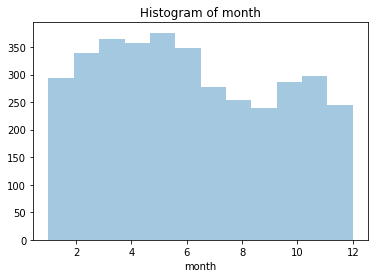

In [13]:
sns.distplot(udemy_courses["month"], kde = False, bins = 12).set_title("Histogram of month")

In [14]:
udemy_courses['price_bin'].value_counts()

Low       2281
Medium     602
High       485
Free       310
Name: price_bin, dtype: int64

#### Analysis

Text(0.5, 1.0, 'Bar_Chart_of_Paid_and_Unpaid_Courses')

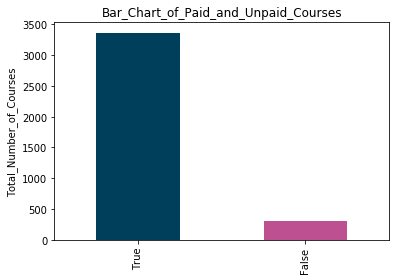

In [15]:
# bar chart of total number of paid courses and unpaid courses
udemy_courses["is_paid"].value_counts().plot(kind="bar", color=["#003f5c", "#bc5090"])
plt.ylabel('Total_Number_of_Courses')
plt.title('Bar_Chart_of_Paid_and_Unpaid_Courses')

Text(0.5, 1.0, 'Number of Courses Based on Price bins')

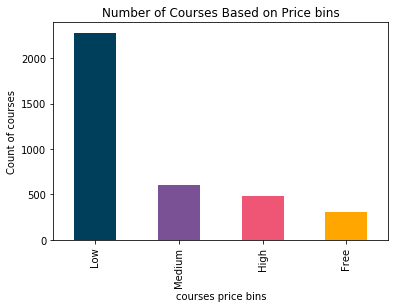

In [16]:
udemy_courses["price_bin"].value_counts().plot(kind="bar", color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.ylabel('Count of courses')
plt.xlabel('courses price bins')
plt.title('Number of Courses Based on Price bins')

Text(0.5, 1.0, 'Bar chart of number of courses based on level of expertise')

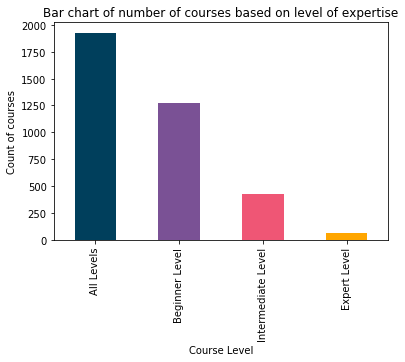

In [17]:
udemy_courses["level"].value_counts().plot(kind="bar", color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.ylabel('Count of courses')
plt.xlabel('Course Level')
plt.title('Bar chart of number of courses based on level of expertise')

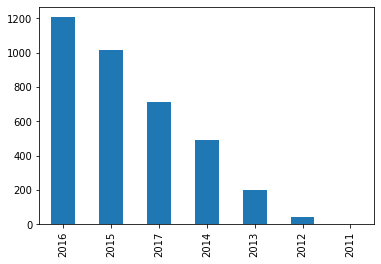

In [18]:
udemy_courses['year'].value_counts().plot(kind = 'bar')

In [19]:
udemy_courses['year'].value_counts()

2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: year, dtype: int64

#### Top 10 Courses and the number of subscribers

Text(0.5, 1.0, 'Top 10 courses based on number of subscribers')

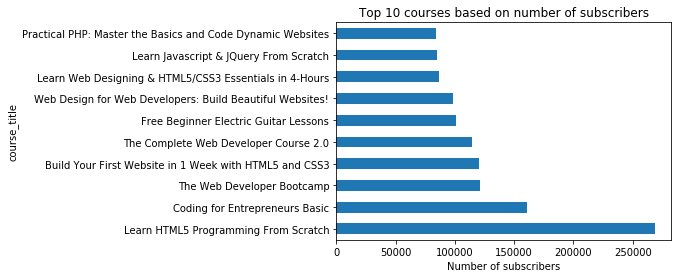

In [29]:
udemy_courses.groupby('course_title')['num_subscribers'].sum().sort_values(ascending=True).nlargest(10).plot(kind='barh')
plt.xlabel('Number of subscribers')
plt.title('Top 10 courses based on number of subscribers')

In [21]:
#udemy_courses.nlargest(10, ['course_title', 'num_subscribers'])
udemy_courses[['course_title', 'num_subscribers']].sort_values('num_subscribers', ascending = False).head(10)

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512
1896,Free Beginner Electric Guitar Lessons,101154
2589,Web Design for Web Developers: Build Beautiful...,98867
2619,Learn Javascript & JQuery From Scratch,84897
3289,Practical PHP: Master the Basics and Code Dyna...,83737
3247,JavaScript: Understanding the Weird Parts,79612


#### Most Popular Subject by Number of subscribers

Text(0.5, 1.0, 'Breakdown of subjects based on total number of subscribers')

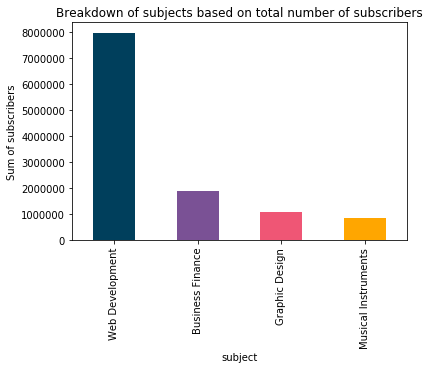

In [30]:
udemy_courses.groupby('subject')['num_subscribers'].sum().sort_values(ascending = False).plot(kind = 'bar', color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.ylabel('Sum of subscribers')
plt.title('Breakdown of subjects based on total number of subscribers')

#### Most popular courses by count

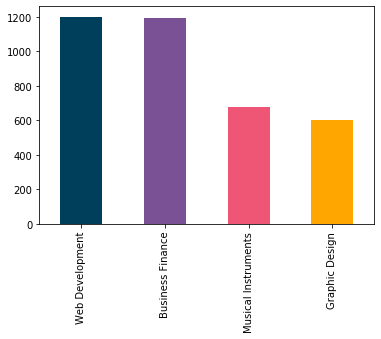

In [28]:
udemy_courses['subject'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])

#### Is there a correlation between number of reviews and the number of subscribers?

In [34]:
udemy_courses[['course_title', 'num_subscribers', 'num_reviews']].sort_values('num_reviews', ascending=False).head(10)

,course_title,num_subscribers,num_reviews
3230,The Web Developer Bootcamp,121584,27445
3232,The Complete Web Developer Course 2.0,114512,22412
3204,Angular 4 (formerly Angular 2) - The Complete ...,73783,19649
3247,JavaScript: Understanding the Weird Parts,79612,16976
3254,Modern React with Redux,50815,15117
3246,Learn and Understand AngularJS,59361,11580
3251,Learn and Understand NodeJS,58208,11123
2827,Learn HTML5 Programming From Scratch,268923,8629
3228,Angular 2 with TypeScript for Beginners: The P...,40070,8341
1979,Pianoforall - Incredible New Way To Learn Pian...,75499,7676


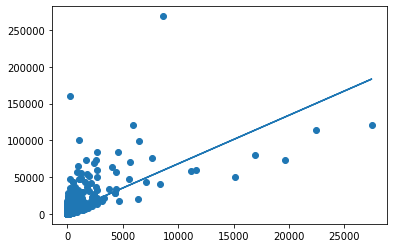

In [35]:
x = udemy_courses['num_reviews']
y = udemy_courses['num_subscribers']
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x,y)
plt.plot(x, mymodel)
plt.show()

#### Does a longer published date equate to more subscribers?

In [36]:
udemy_courses[['course_title', 'num_subscribers', 'date_published']].sort_values('date_published', ascending=True).head(10)

,course_title,num_subscribers,date_published
2985,Javascript for Beginners,3697,2011-07-09
2491,HTML Tutorial: HTML & CSS for Beginners,12458,2011-09-09
2701,Become a Web Developer from Scratch,69186,2011-11-19
3082,Learn jQuery: An In-depth Course For Beginners,7014,2011-11-29
2700,Become a Certified Web Developer,26673,2011-12-20
2330,Aprende a Tocar Teclado - Piano,119,2012-01-26
3401,Learn HTML5 At Your Own Pace. Ideal for Beginners,3026,2012-02-28
1294,Discover the 7 Secrets to Figure Drawing: Draw...,2634,2012-04-04
2680,HTML Workshop,25854,2012-04-08
1229,Color Basics for Print Designers,372,2012-04-23


<function matplotlib.pyplot.show(*args, **kw)>

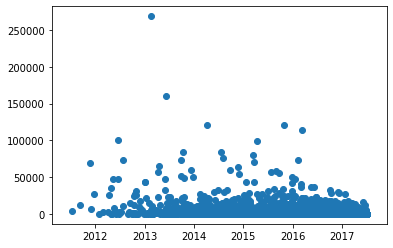

In [40]:
a = udemy_courses['date_published']
b = udemy_courses['num_subscribers']
plt.scatter(a,b)
plt.show

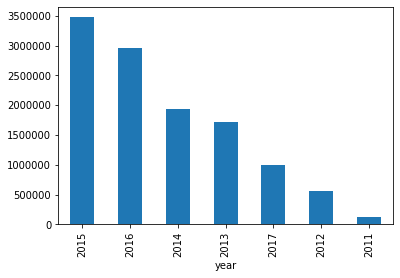

In [39]:
udemy_courses.groupby('year')['num_subscribers'].sum().sort_values(ascending = False).plot(kind = 'bar')

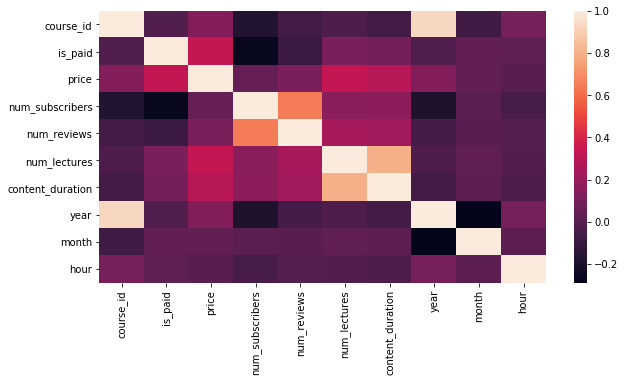

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(udemy_courses.corr())